In [79]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [80]:
# Load in csv
city_data = r"C:\Users\sitra\Desktop\RUTSOM201710DATA5-Class-Repository-DATA\HW5\Pyber\raw_data/city_data.csv"
ride_data = r"C:\Users\sitra\Desktop\RUTSOM201710DATA5-Class-Repository-DATA\HW5\Pyber\raw_data/ride_data.csv"

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)
city_data_df.head()


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [81]:
# Merge the two datasets with common data on "Wrestler"
combined_car_df = pd.merge(city_data_df, ride_data_df,on="city")
combined_car_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [82]:

city_ride_count=combined_car_df['city'].value_counts()

city_ride_count.head()


Port James       64
Swansonbury      34
Port Johnstad    34
South Louis      32
Jacobfort        31
Name: city, dtype: int64

In [83]:
combined_car_copy_df=combined_car_df.copy()

avg_fare_df=round(combined_car_copy_df.groupby('city')["fare"].mean(),2)
avg_fare_df.head()

city
Alvarezhaven    23.93
Alyssaberg      20.61
Anitamouth      37.32
Antoniomouth    23.62
Aprilchester    21.98
Name: fare, dtype: float64

In [84]:
type_df=combined_car_copy_df.groupby('city')['type'].unique()
type_df.head()

city
Alvarezhaven       [Urban]
Alyssaberg         [Urban]
Anitamouth      [Suburban]
Antoniomouth       [Urban]
Aprilchester       [Urban]
Name: type, dtype: object

In [85]:
type_df=combined_car_copy_df.groupby('city')['driver_count'].unique()
type_df.head()

city
Alvarezhaven    [21]
Alyssaberg      [67]
Anitamouth      [16]
Antoniomouth    [21]
Aprilchester    [49]
Name: driver_count, dtype: object

In [86]:
#New Dataframe with groupby mean value of 'fare'
grouped_df =combined_car_copy_df.groupby('city')['fare']
new_df=pd.DataFrame(round(grouped_df.mean(),2).reset_index(name="Avg Fare"))
new_df.head()

,city,Avg Fare
0,Alvarezhaven,23.93
1,Alyssaberg,20.61
2,Anitamouth,37.32
3,Antoniomouth,23.62
4,Aprilchester,21.98


In [87]:
grouped_df =combined_car_copy_df.groupby('type')['fare']
new_df=pd.DataFrame(round(grouped_df.sum(),2).reset_index(name="Total Fare"))
new_df.head()

,type,Total Fare
0,Rural,4255.09
1,Suburban,20335.69
2,Urban,40078.34


In [88]:
# DATASET 1
Total_fare = new_df['Total Fare']
Type = new_df["type"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.05, 0.05, 0)

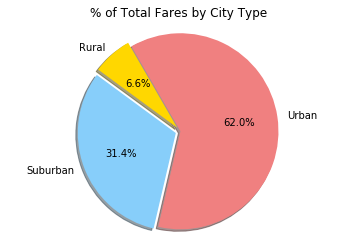

In [89]:
plt.title("% of Total Fares by City Type")
plt.pie(Total_fare, explode=explode, labels=Type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

In [90]:
grouped_df =combined_car_copy_df.groupby('type')['city']
new_df=pd.DataFrame(grouped_df.size().reset_index(name="Total Rides"))
new_df.head()

,type,Total Rides
0,Rural,125
1,Suburban,657
2,Urban,1625


In [91]:
# DATASET 3
Total_rides = new_df['Total Rides']
Type = new_df["type"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.05, 0.05, 0)

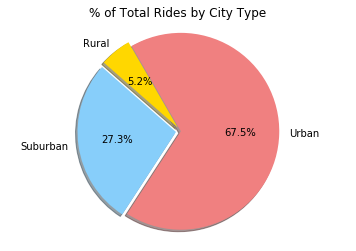

In [92]:
plt.title("% of Total Rides by City Type")
plt.pie(Total_rides, explode=explode, labels=Type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

In [93]:
grouped_df =city_data_df.groupby('type')['driver_count']
new_df=pd.DataFrame(grouped_df.sum().reset_index(name="Total Drivers"))
new_df.head()

,type,Total Drivers
0,Rural,104
1,Suburban,638
2,Urban,2607


In [94]:
# DATASET 3
Total_drivers = new_df['Total Drivers']
Type = new_df["type"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.05, 0.05, 0)

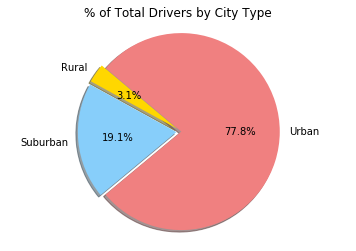

In [95]:
plt.title("% of Total Drivers by City Type")
plt.pie(Total_drivers, explode=explode, labels=Type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()